# Relátorio  de Analise VIII

## Identificando e removendo outliers

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure',figsize= (14,7))

In [5]:
dados = pd.read_csv('data/aluguel_residencial2.csv', sep=';')
dados.head(10)

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,1700.0,Apartamento
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,Casa
2,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,800.0,Apartamento
3,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,800.0,Apartamento
4,4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,Apartamento
5,5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1300.0,Apartamento
6,6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,Casa
7,7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,Casa
8,8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,1200.0,Apartamento
9,9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,1500.0,Apartamento


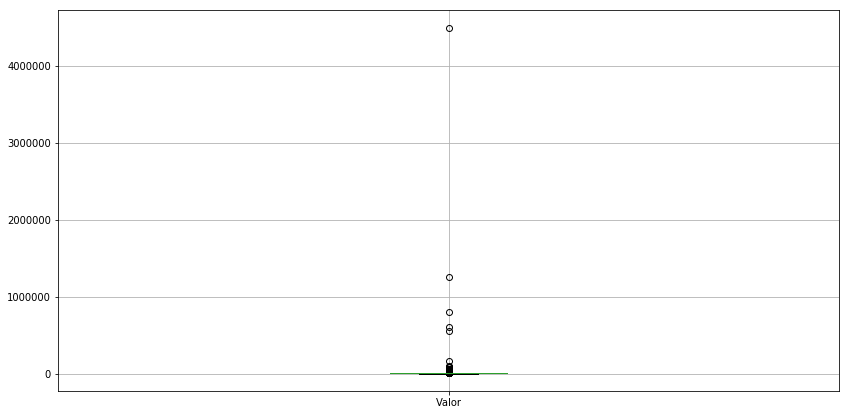

In [13]:
dados.boxplot(['Valor'])

In [15]:
dados[dados['Valor'] >=500000]

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7894,7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,600000.0,Apartamento
11013,11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,800000.0,Casa
13099,13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,550000.0,Apartamento
14325,14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,1250000.0,Apartamento
16056,16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,4500000.0,Apartamento


In [16]:
valor = dados['Valor']

### Cálculos estátisticos .. Quarties 

<img src = "box-plot.png" width = 70%>

In [21]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [22]:
selecao = (valor  >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

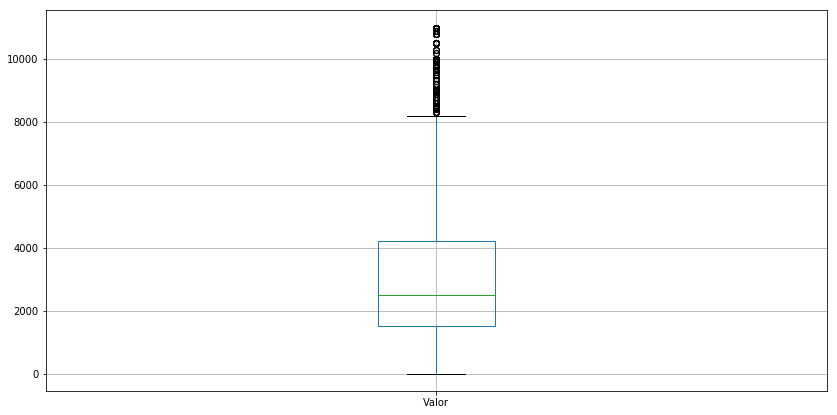

In [23]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC85E13240>]],
      dtype=object)

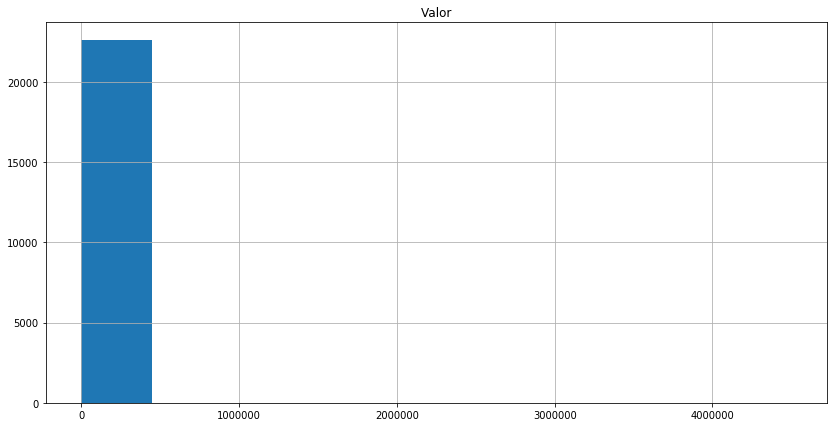

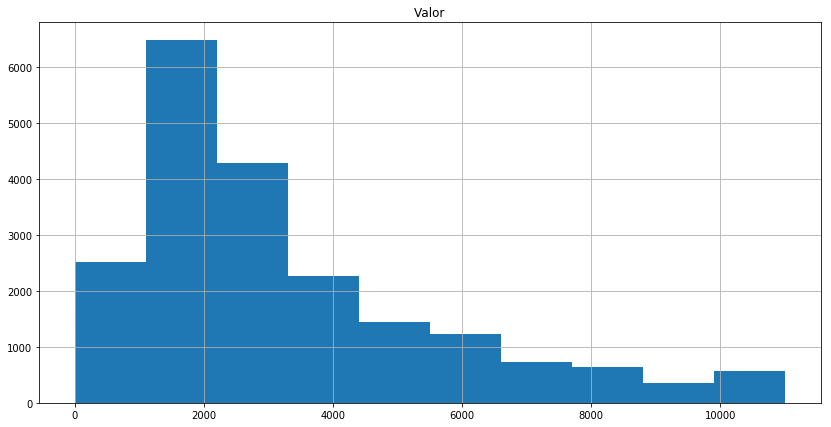

In [24]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Continuação..


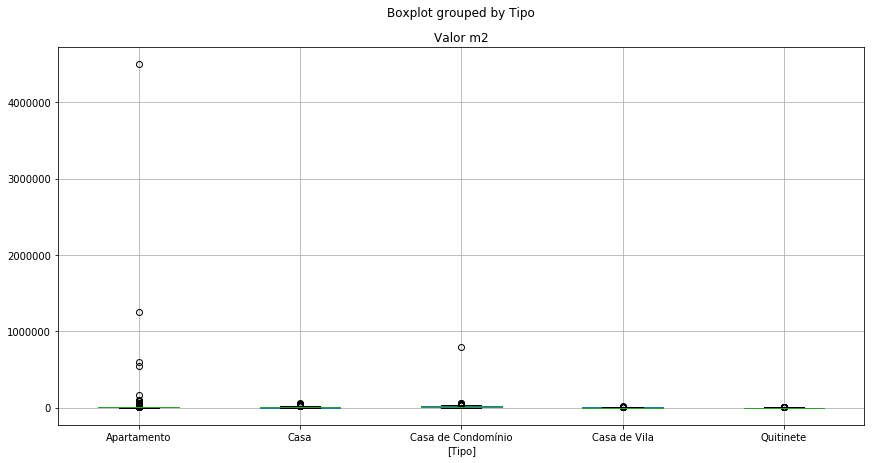

In [26]:
dados.boxplot(['Valor m2'], by = ['Tipo'])

In [31]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [32]:
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     5,     8,     9,    10,    11,    13,
                15,
             ...
             22567, 22568, 22570, 22571, 22572, 22573, 22575, 22577, 22578,
             22579],
            dtype='int64', length=19532),
 'Casa': Int64Index([    1,    24,    56,    60,   100,   104,   150,   166,   188,
               248,
             ...
             22332, 22357, 22365, 22420, 22425, 22452, 22510, 22535, 22547,
             22558],
            dtype='int64', length=967),
 'Casa de Condomínio': Int64Index([    6,     7,    14,    18,    44,    61,   172,   174,   191,
               217,
             ...
             22462, 22464, 22472, 22506, 22517, 22518, 22536, 22545, 22555,
             22574],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   85,   222,   230,   314,   343,   718,   846,   868,   943,
              1042,
             ...
             21922, 21927, 21991, 22067, 22096, 22109, 22338, 22387, 22469

In [33]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [34]:
Q1

Tipo
Apartamento           1600.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [35]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [36]:
IIQ

Tipo
Apartamento            3400.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [37]:
limite_inferior

Tipo
Apartamento           -3500.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [38]:
limite_superior

Tipo
Apartamento           10100.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [39]:
limite_superior['Casa']

22850.0

In [47]:
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo']== tipo
    eh_dentro_limite = (dados['Valor']>= limite_inferior[tipo]) & (dados['Valor']<= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    
    dados_selecao = dados[selecao] 
    dados_new = pd.concat([dados_new,dados_selecao])

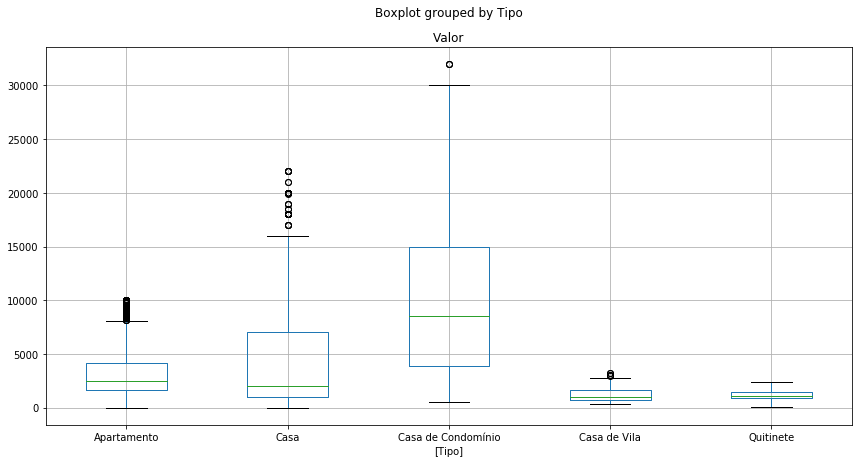

In [50]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [51]:
dados_new.to_csv('data/aluguel_residencial_sem_outliers.csv', sep=';', index=False)